In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
app = pd.read_csv("application_record.csv")

In [4]:
credit = pd.read_csv("credit_record.csv")

## [1] Description of the features

In [5]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
app.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [7]:
app.drop('OCCUPATION_TYPE', axis = 1,inplace = True)

## [2] Description of the app dataset

In [8]:
app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [9]:
app.skew(axis = 0)

ID                  0.212718
CNT_CHILDREN        1.806941
AMT_INCOME_TOTAL    8.834066
DAYS_BIRTH         -0.160181
DAYS_EMPLOYED       1.739495
FLAG_MOBIL          0.000000
FLAG_WORK_PHONE     1.452898
FLAG_PHONE          0.937568
FLAG_EMAIL          2.522482
CNT_FAM_MEMBERS     0.919676
dtype: float64

In [10]:
len(app['ID'].unique())

438510

In [11]:
len(app['ID'])

438557

Dropping the duplicates for the Application Dataset

In [12]:
app.drop_duplicates('ID', keep = 'last')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,2.0


In [13]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## [3] Info about Credit features

In [14]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [15]:
app.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
CNT_FAM_MEMBERS        float64
dtype: object

### Cleaning the data and verifying all the data points being useful to the data set or not.

In [16]:
app['CODE_GENDER'].value_counts()

F    294440
M    144117
Name: CODE_GENDER, dtype: int64

In [17]:
app['FLAG_OWN_CAR'].value_counts()

N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64

In [18]:
app['FLAG_OWN_REALTY'].value_counts()

Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64

In [19]:
app['NAME_INCOME_TYPE'].value_counts()

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

In [20]:
app['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64

In [21]:
app['NAME_FAMILY_STATUS'].value_counts()

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64

In [22]:
app['NAME_HOUSING_TYPE'].value_counts()

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

In [23]:
app[app['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243])

Replacing the employement days with the years of employement

In [24]:
app['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [25]:
app[app['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([], dtype=int64)

In [26]:
app['DAYS_EMPLOYED'] = round(app['DAYS_EMPLOYED']/-365.0,1)

In [27]:
app.rename(columns = {'DAYS_EMPLOYED': "YEARS_EMPLOYED"}, inplace=True)

\
Replacing the days of birth with age

In [28]:
app['DAYS_BIRTH'] = round(app['DAYS_BIRTH']/-365.0)

In [29]:
app.rename(columns = {'DAYS_BIRTH': "AGE"}, inplace=True)

In [30]:
app.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
AGE                    float64
YEARS_EMPLOYED         float64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
CNT_FAM_MEMBERS        float64
dtype: object

\
Dropping unnecessary columns

In [31]:
app['FLAG_MOBIL'].unique()

array([1])

In [32]:
app.drop('FLAG_MOBIL', axis = 1, inplace = True)

In [33]:
app.drop(['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis = 1, inplace = True)

\
Changing the Gender and boolean columns with 0 and 1

In [34]:
app['CODE_GENDER'].replace('M',0, inplace=True)

In [35]:
app['CODE_GENDER'].replace('F',1, inplace=True)

In [36]:
app['FLAG_OWN_CAR'].replace('Y',1, inplace=True)

In [37]:
app['FLAG_OWN_CAR'].replace('N',0, inplace=True)

In [38]:
app['FLAG_OWN_REALTY'].replace('Y',1, inplace=True)

In [39]:
app['FLAG_OWN_REALTY'].replace('N',0, inplace=True)

Initial model utilized a min max scaled version of AMT_INCOME_TOTAL and then Standard Scaler was used to scale all the column. In the new model, this idea was dropped and only the Standard Scaler was used to scale all the columns. 

In [40]:
# app['AMT_INCOME_TOTAL'] = (app['AMT_INCOME_TOTAL'] - app['AMT_INCOME_TOTAL'].min())/(app['AMT_INCOME_TOTAL'].max() - app['AMT_INCOME_TOTAL'].min())

## [4] Boxplots

\
Checking all the boxplots to find the outliers in the data

<AxesSubplot:>

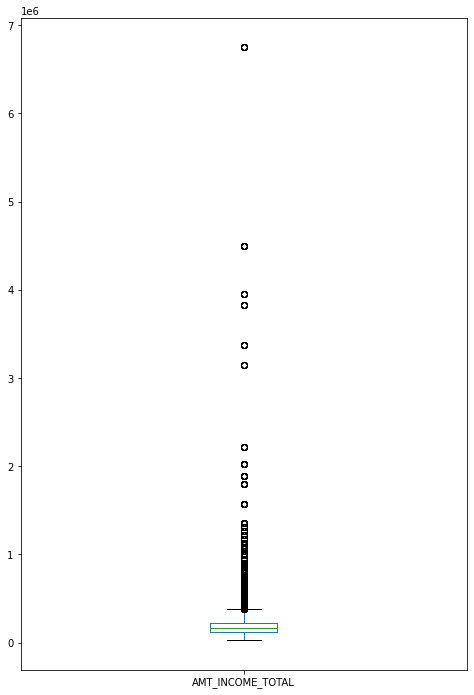

In [41]:
app['AMT_INCOME_TOTAL'].plot(kind = 'box',figsize = (8,12))

<AxesSubplot:>

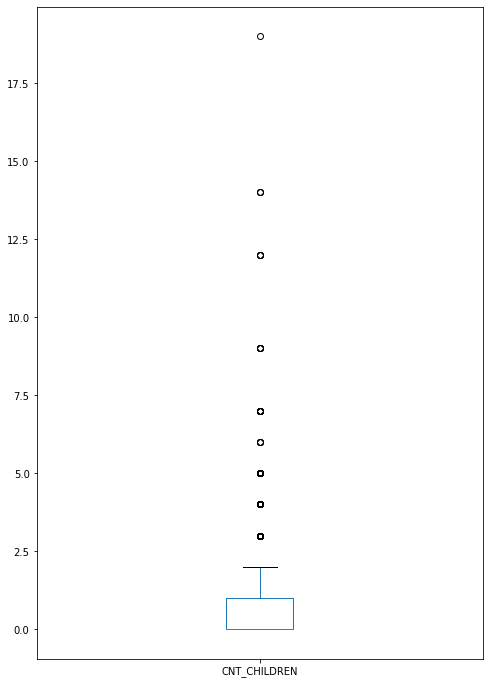

In [42]:
app['CNT_CHILDREN'].plot(kind = 'box',figsize = (8,12))

<AxesSubplot:>

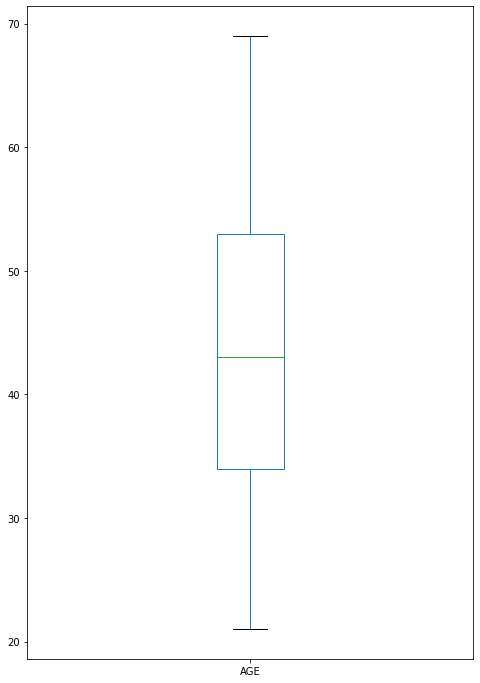

In [43]:
app['AGE'].plot(kind = 'box',figsize = (8,12))

<AxesSubplot:>

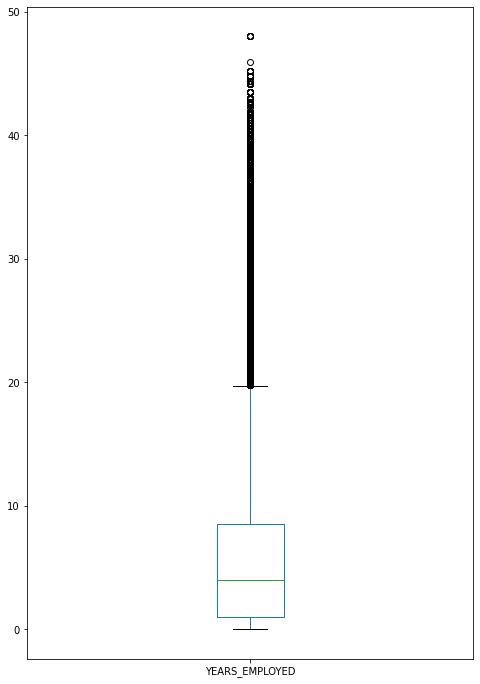

In [44]:
app['YEARS_EMPLOYED'].plot(kind = 'box',figsize = (8,12))

<AxesSubplot:>

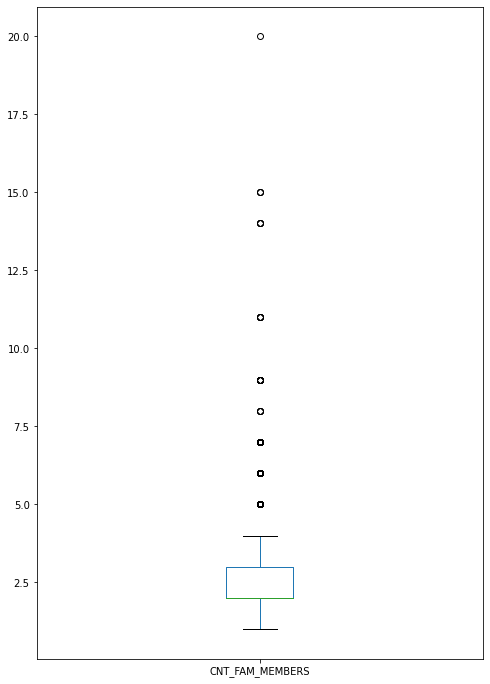

In [45]:
app['CNT_FAM_MEMBERS'].plot(kind = 'box',figsize = (8,12))

## [5] REMOVING OUTLIERS USING IQR METHOD

\
Removing the outliers at the 10th percentile and the 90th percentile

In [46]:
Q1 = app.quantile(0.1)
Q3 = app.quantile(0.9)
IQR = Q3 - Q1
print(IQR)

ID                  1541490.8
CODE_GENDER               1.0
FLAG_OWN_CAR              1.0
FLAG_OWN_REALTY           1.0
CNT_CHILDREN              2.0
AMT_INCOME_TOTAL     225000.0
AGE                      31.0
YEARS_EMPLOYED           14.5
CNT_FAM_MEMBERS           2.0
dtype: float64


In [47]:
app1 = app[~((app < (Q1 - 1.5 * IQR)) |(app > (Q3 + 1.5 * IQR))).any(axis=1)]
app1.shape

(434852, 13)

In [48]:
app1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.4,2.0
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.4,2.0
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.1,2.0
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.4,1.0
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.4,1.0


In [49]:
app1.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE                    0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
dtype: int64

In [50]:
credit['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

\
Changing the Status variable

In [51]:
credit['STATUS'].replace(['X','C'],0, inplace=True)

In [52]:
credit['STATUS'].replace(['2','3','4','5'],1, inplace=True)

In [53]:
credit['STATUS'].value_counts()

0    1034381
1      14194
Name: STATUS, dtype: int64

In [54]:
credit['ID'].unique().shape

(45985,)

In [55]:
credit1 = credit.groupby('ID').agg(max).reset_index()

In [56]:
credit1.drop('MONTHS_BALANCE', axis=1, inplace=True)
credit1.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [57]:
df = pd.merge(app1, credit1, on = 'ID', how = 'inner')
df.shape

(36109, 14)

In [58]:
df.drop('ID', axis=1, inplace=True)

In [59]:
len(df) - len(df.drop_duplicates())
df = df.drop_duplicates()
df.reset_index(drop=True ,inplace=True)

In [60]:
df.shape

(11013, 13)

\
Plotting the visualition between the years employed and the Total Income Amount

In [61]:
import seaborn as sns

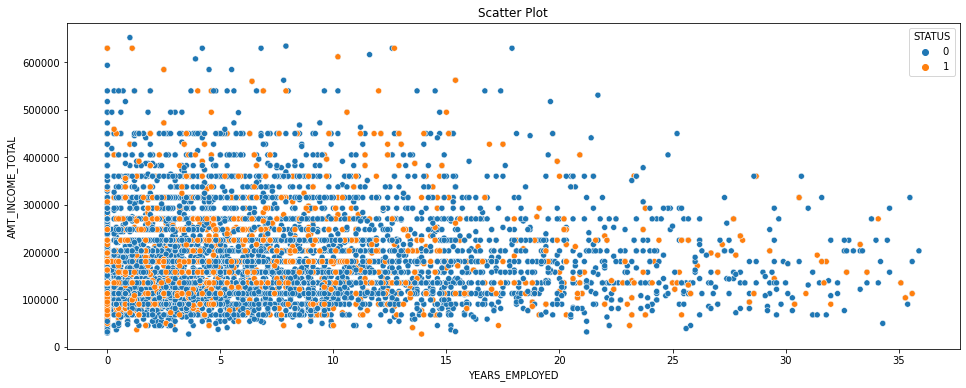

In [62]:
plt.figure(figsize = (16,6))
sns.scatterplot(df['YEARS_EMPLOYED'], df['AMT_INCOME_TOTAL'], hue=df['STATUS'])
plt.title('Scatter Plot')
plt.show()

In [63]:
cat_columns = df.columns[(df.dtypes =='object').values].tolist()
cat_columns

['NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [64]:
only_num = df.drop(['NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE'], axis = 1)

In [65]:
import sklearn

## [7] LABEL ENCODING

\
Encoding all the catergorical variables

In [66]:
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        enc = LabelEncoder()
        df[col] = enc.fit_transform(df[col])
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,0,1,1,0,427500.0,4,1,0,4,33.0,12.4,2.0,1
1,0,1,1,0,112500.0,4,4,1,1,59.0,3.1,2.0,0
2,1,0,1,0,270000.0,0,4,3,1,52.0,8.4,1.0,0
3,1,0,1,0,283500.0,1,1,2,1,62.0,-0.0,1.0,0
4,0,1,1,0,270000.0,4,1,1,1,46.0,2.1,2.0,0


In [67]:
## Tried One-Hot Encoding, but couldn't get proper results of the encoded variables

In [68]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(drop = 'if_binary')
# cat = pd.DataFrame(ohe.fit_transform(cat_columns).todense(), columns = ohe.get_feature_names_out(cat_columns.columns))

In [69]:
# df = pd.concat([df,cat], axis = 1)
# df.drop(cat.columns, axis = 1, inplace = True)

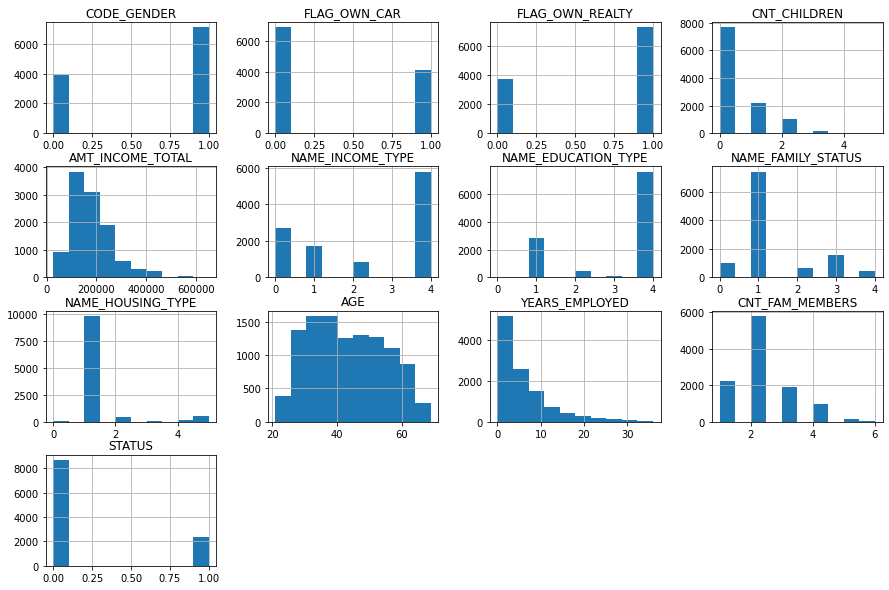

In [70]:
df.hist(figsize = (15,10))
plt.show()

## [8] Plot's to understand the distribution of the data

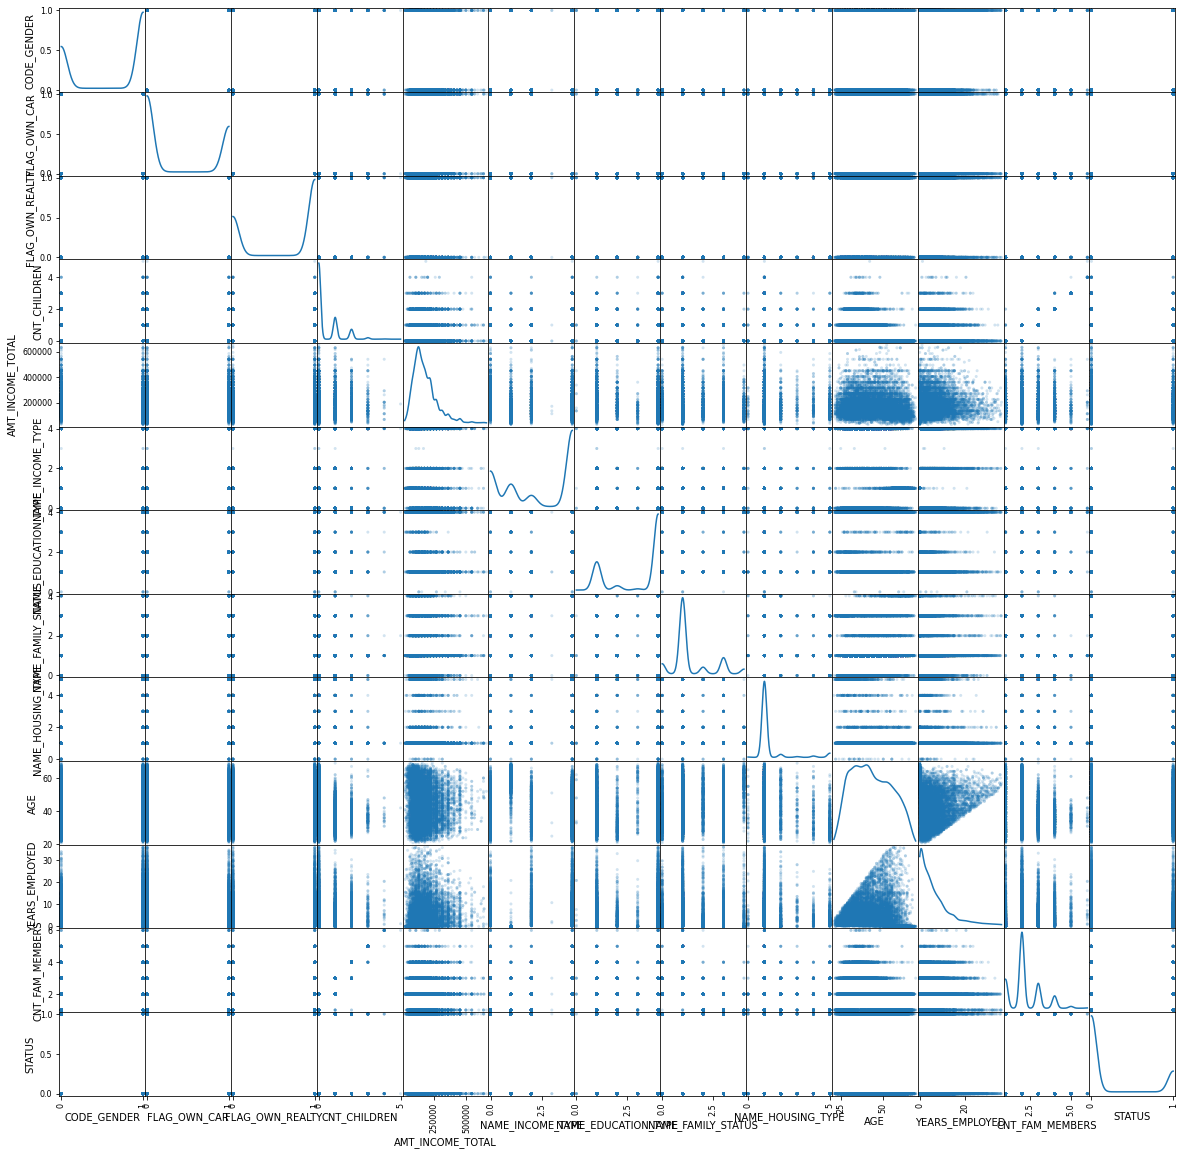

In [71]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()

<AxesSubplot:>

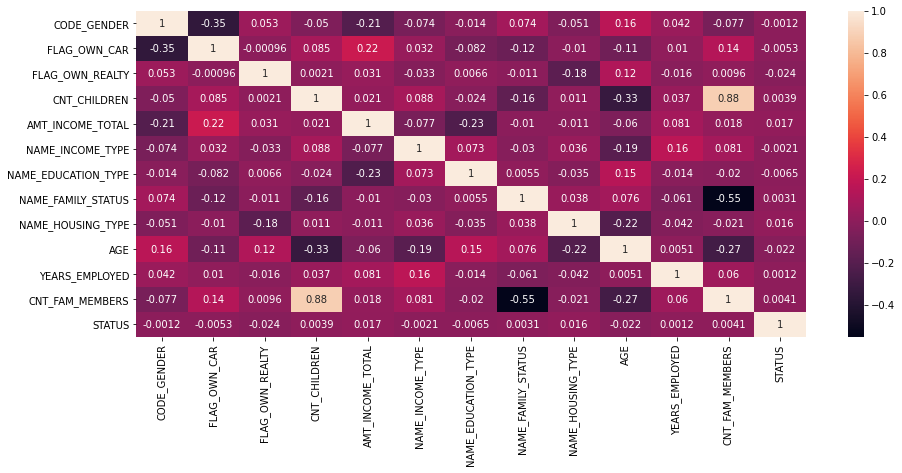

In [72]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr(), annot=True)

## [9] Split of training and testing data

\
Splitting the training and testing data with a ratio of 3:1

In [73]:
from sklearn.model_selection import train_test_split

X = df.drop(['STATUS'], axis=1)
y = df['STATUS']

In [74]:
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,0,1,1,0,427500.0,4,1,0,4,33.0,12.4,2.0
1,0,1,1,0,112500.0,4,4,1,1,59.0,3.1,2.0
2,1,0,1,0,270000.0,0,4,3,1,52.0,8.4,1.0
3,1,0,1,0,283500.0,1,1,2,1,62.0,-0.0,1.0
4,0,1,1,0,270000.0,4,1,1,1,46.0,2.1,2.0


In [75]:
y.value_counts()

0    8655
1    2358
Name: STATUS, dtype: int64

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

In [77]:
x_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
8523,0,0,1,0,112500.0,0,4,3,1,26.0,4.0,1.0
994,0,1,1,0,202500.0,0,4,1,1,48.0,0.6,2.0
3749,0,1,0,0,67500.0,4,4,1,1,61.0,6.0,2.0
1554,0,0,1,1,112500.0,4,1,1,1,37.0,15.0,3.0
3771,1,0,0,0,234000.0,4,1,3,1,29.0,5.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,1,0,0,360000.0,0,4,1,1,46.0,13.6,2.0
5191,0,0,1,0,135000.0,0,4,1,1,63.0,1.8,2.0
5390,1,0,1,0,157500.0,4,1,1,1,49.0,13.9,2.0
860,1,0,0,0,157500.0,4,4,1,1,38.0,5.1,2.0


## [10] Scaling of Data

\
Using the Standard Scaler to scale all the data.

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

In [80]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [81]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test, y_test)

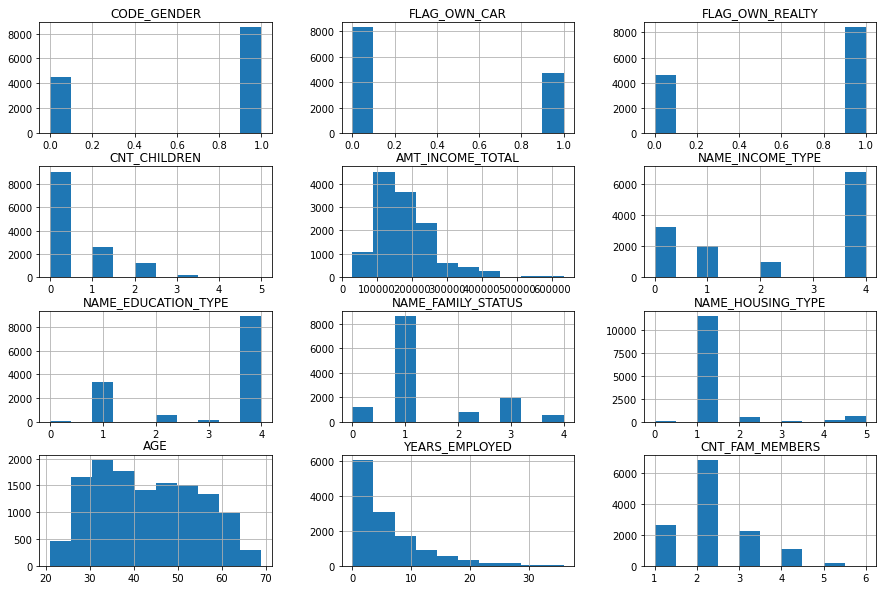

In [82]:
x_train_oversam.hist(figsize = (15,10))
plt.show()

In [83]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8259 entries, 8523 to 7270
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          8259 non-null   int64  
 1   FLAG_OWN_CAR         8259 non-null   int64  
 2   FLAG_OWN_REALTY      8259 non-null   int64  
 3   CNT_CHILDREN         8259 non-null   int64  
 4   AMT_INCOME_TOTAL     8259 non-null   float64
 5   NAME_INCOME_TYPE     8259 non-null   int64  
 6   NAME_EDUCATION_TYPE  8259 non-null   int64  
 7   NAME_FAMILY_STATUS   8259 non-null   int64  
 8   NAME_HOUSING_TYPE    8259 non-null   int64  
 9   AGE                  8259 non-null   float64
 10  YEARS_EMPLOYED       8259 non-null   float64
 11  CNT_FAM_MEMBERS      8259 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 838.8 KB


## [11] Training data with Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score


log = LogisticRegression()
log.fit(x_train_scaled, y_train)

LogisticRegression()

In [85]:
print("Accuracy:",log.score(x_test_scaled, y_test)*100)
y_pred = log.predict(x_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 78.43137254901961
[[2160    0]
 [ 594    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2160
           1       0.00      0.00      0.00       594

    accuracy                           0.78      2754
   macro avg       0.39      0.50      0.44      2754
weighted avg       0.62      0.78      0.69      2754



### Logistic regression doing a poor job in classification without oversampling. 

## [12] Decision Tree on imbalanced data

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dm = DecisionTreeClassifier(max_depth=13,min_samples_split=8)

dm.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=13, min_samples_split=8)

In [87]:
print("Accuracy:",dm.score(x_test_scaled, y_test)*100)
y_pred = dm.predict(x_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 72.54901960784314

Confusion matrix :
[[1978  182]
 [ 574   20]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2160
           1       0.10      0.03      0.05       594

    accuracy                           0.73      2754
   macro avg       0.44      0.47      0.44      2754
weighted avg       0.63      0.73      0.67      2754



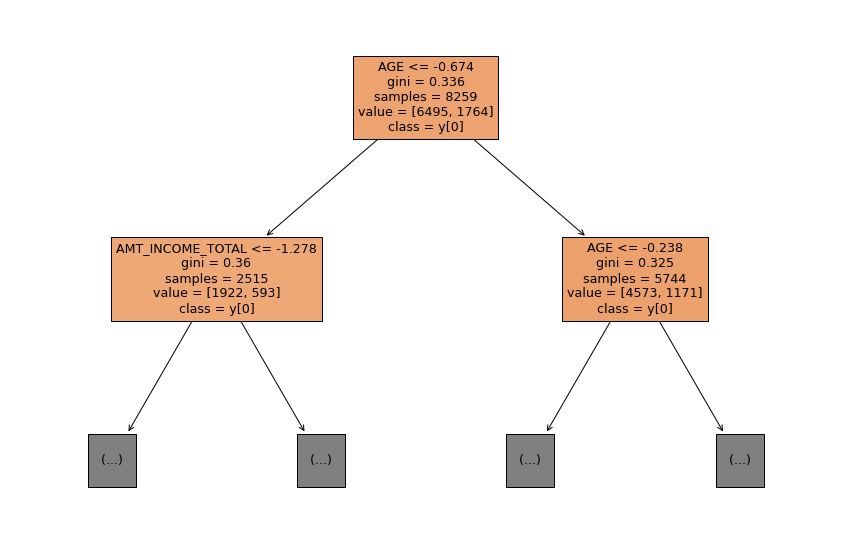

In [88]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dm,feature_names=x_train_scaled.columns,  
                   class_names=True, max_depth = 1,
                   filled=True)
plt.show()

## [13] XGBoost on imbalanced data

In [89]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train_scaled, y_train)

[23:07:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=40,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
print('Accuracy : ', xgb.score(x_test_scaled, y_test)*100, '%')
y_pred = xgb.predict(x_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  75.19970951343501 %
[[2061   99]
 [ 584   10]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      2160
           1       0.09      0.02      0.03       594

    accuracy                           0.75      2754
   macro avg       0.44      0.49      0.44      2754
weighted avg       0.63      0.75      0.68      2754



## [14] Oversampling data for Numerical and Categorial variables

In [91]:
from imblearn.over_sampling import SMOTENC

oversample = SMOTENC(categorical_features = [5,6,7,8])

x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

## [15] Logistic Regression for oversampled data

In [92]:
log = LogisticRegression()
log.fit(x_train_oversam, y_train_oversam)

LogisticRegression()

In [93]:
print("Accuracy:",log.score(x_test_oversam, y_test_oversam)*100)
y_pred = log.predict(x_test_oversam)
print(confusion_matrix(y_test_oversam, y_pred))
print(classification_report(y_test_oversam, y_pred))

Accuracy: 56.89814814814815
[[1091 1069]
 [ 793 1367]]
              precision    recall  f1-score   support

           0       0.58      0.51      0.54      2160
           1       0.56      0.63      0.59      2160

    accuracy                           0.57      4320
   macro avg       0.57      0.57      0.57      4320
weighted avg       0.57      0.57      0.57      4320



## [16] Decision Tree on oversampled data

In [94]:
dm = DecisionTreeClassifier(max_depth=14,min_samples_split=8)

dm.fit(x_train_oversam, y_train_oversam)

DecisionTreeClassifier(max_depth=14, min_samples_split=8)

In [95]:
print("Accuracy:",dm.score(x_test_oversam, y_test_oversam)*100)
y_pred = dm.predict(x_test_oversam)
print(confusion_matrix(y_test_oversam, y_pred))
print(classification_report(y_test_oversam, y_pred))

Accuracy: 65.92592592592592
[[1515  645]
 [ 827 1333]]
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      2160
           1       0.67      0.62      0.64      2160

    accuracy                           0.66      4320
   macro avg       0.66      0.66      0.66      4320
weighted avg       0.66      0.66      0.66      4320



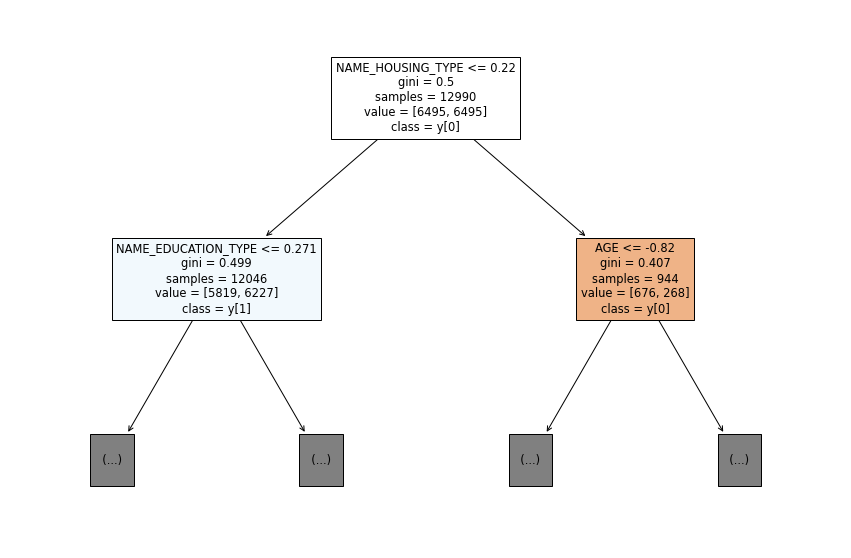

In [96]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dm,max_depth = 1,
               feature_names=x_train_oversam.columns,  
                   class_names=True,
                   filled=True)
plt.show()

## [17] XGBoost on oversampled data

In [97]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train_oversam, y_train_oversam)

[23:08:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=40,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
print('Accuracy : ', xgb.score(x_test_oversam, y_test_oversam)*100, '%')
y_pred = xgb.predict(x_test_oversam)
print(confusion_matrix(y_test_oversam, y_pred))
print(classification_report(y_test_oversam, y_pred))

Accuracy :  82.36111111111111 %
[[2004  156]
 [ 606 1554]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      2160
           1       0.91      0.72      0.80      2160

    accuracy                           0.82      4320
   macro avg       0.84      0.82      0.82      4320
weighted avg       0.84      0.82      0.82      4320



## [18] Doing work on only numerical features

In [99]:
only_num.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,0,1,1,0,427500.0,33.0,12.4,2.0,1
1,0,1,1,0,112500.0,59.0,3.1,2.0,0
2,1,0,1,0,270000.0,52.0,8.4,1.0,0
3,1,0,1,0,283500.0,62.0,-0.0,1.0,0
4,0,1,1,0,270000.0,46.0,2.1,2.0,0


In [100]:
X = only_num.drop('STATUS', axis=1)
y = only_num['STATUS']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 42)
ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

In [101]:
x_train_scaled

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,-1.356501,-0.764401,0.718504,-0.594535,-0.772423,-1.502243,-0.286568,-1.313923
1,-1.356501,1.308214,0.718504,-0.594535,0.265367,0.416176,-0.836012,-0.211333
2,-1.356501,1.308214,-1.391781,-0.594535,-1.291318,1.549787,0.036635,-0.211333
3,-1.356501,-0.764401,0.718504,0.777048,-0.772423,-0.543033,1.491047,0.891257
4,0.737190,-0.764401,-1.391781,-0.594535,0.628594,-1.240640,-0.076486,-1.313923
...,...,...,...,...,...,...,...,...
8254,0.737190,1.308214,-1.391781,-0.594535,2.081499,0.241774,1.264805,-0.211333
8255,-1.356501,-0.764401,0.718504,-0.594535,-0.512975,1.724188,-0.642091,-0.211333
8256,0.737190,-0.764401,0.718504,-0.594535,-0.253528,0.503377,1.313285,-0.211333
8257,0.737190,-0.764401,-1.391781,-0.594535,-0.253528,-0.455833,-0.108806,-0.211333


## [19] Logistic on imbalanced numerical data

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score


log = LogisticRegression()
log.fit(x_train_scaled, y_train)

LogisticRegression()

In [103]:
print("Accuracy:",log.score(x_test_scaled, y_test)*100)
y_pred = log.predict(x_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 78.43137254901961
[[2160    0]
 [ 594    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2160
           1       0.00      0.00      0.00       594

    accuracy                           0.78      2754
   macro avg       0.39      0.50      0.44      2754
weighted avg       0.62      0.78      0.69      2754



## [20] Decision Tree on imbalanced numerical Data

In [104]:
dm = DecisionTreeClassifier(max_depth=14,min_samples_split=8)

dm.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=14, min_samples_split=8)

In [105]:
print("Accuracy:",dm.score(x_test_scaled, y_test)*100)
y_pred = dm.predict(x_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 73.20261437908496

Confusion matrix :
[[1983  177]
 [ 561   33]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2160
           1       0.16      0.06      0.08       594

    accuracy                           0.73      2754
   macro avg       0.47      0.49      0.46      2754
weighted avg       0.65      0.73      0.68      2754



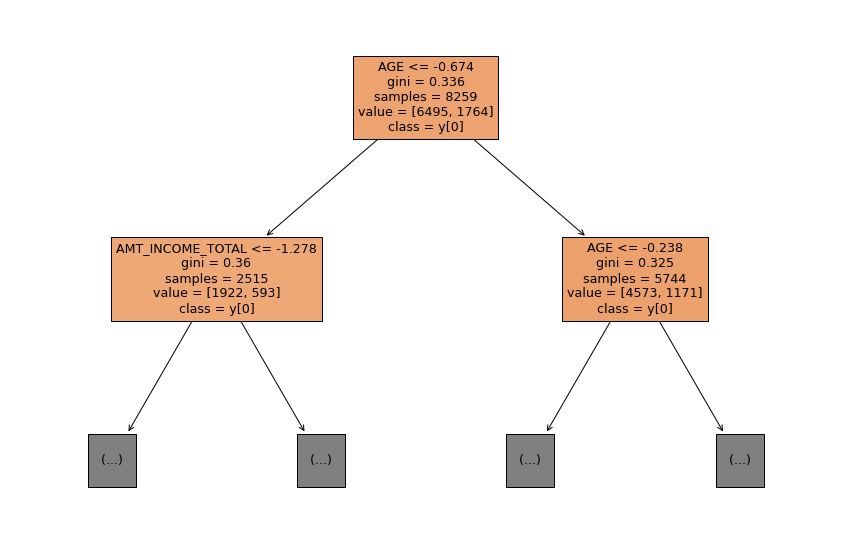

In [106]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dm,max_depth = 1,
               feature_names=x_train_scaled.columns,  
                   class_names=True,
                   filled=True)
plt.show()

## [21] XGBoost on imbalanced Numerical Data

In [107]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train_scaled, y_train)

[23:08:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=40,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
print('Accuracy : ', xgb.score(x_test_scaled, y_test)*100, '%')
y_pred = xgb.predict(x_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  75.49019607843137 %
[[2071   89]
 [ 586    8]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      2160
           1       0.08      0.01      0.02       594

    accuracy                           0.75      2754
   macro avg       0.43      0.49      0.44      2754
weighted avg       0.63      0.75      0.68      2754



## [22] Adjusting the imbalance of the data:

## [23] Random Oversampling

In [109]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()

x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [110]:
x_train_oversam

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,-1.356501,-0.764401,0.718504,-0.594535,-0.772423,-1.502243,-0.286568,-1.313923
1,-1.356501,1.308214,0.718504,-0.594535,0.265367,0.416176,-0.836012,-0.211333
2,-1.356501,1.308214,-1.391781,-0.594535,-1.291318,1.549787,0.036635,-0.211333
3,-1.356501,-0.764401,0.718504,0.777048,-0.772423,-0.543033,1.491047,0.891257
4,0.737190,-0.764401,-1.391781,-0.594535,0.628594,-1.240640,-0.076486,-1.313923
...,...,...,...,...,...,...,...,...
12985,-1.356501,-0.764401,0.718504,0.777048,-1.031870,-0.368632,-0.415849,0.891257
12986,-1.356501,-0.764401,0.718504,-0.594535,-0.512975,-1.502243,-0.739052,-1.313923
12987,0.737190,-0.764401,0.718504,0.777048,-0.512975,-1.327841,-0.803692,0.891257
12988,0.737190,-0.764401,0.718504,-0.594535,0.784262,-0.717435,-0.577450,-0.211333


## [24] Logistic Regression

In [111]:
log = LogisticRegression()
log.fit(x_train_oversam, y_train_oversam)

LogisticRegression()

In [112]:
print("Accuracy:",log.score(x_test_oversam, y_test_oversam)*100)
y_pred = log.predict(x_test_oversam)
print(confusion_matrix(y_test_oversam, y_pred))
print(classification_report(y_test_oversam, y_pred))

Accuracy: 49.907407407407405
[[1208  952]
 [1212  948]]
              precision    recall  f1-score   support

           0       0.50      0.56      0.53      2160
           1       0.50      0.44      0.47      2160

    accuracy                           0.50      4320
   macro avg       0.50      0.50      0.50      4320
weighted avg       0.50      0.50      0.50      4320



## [25] Decision Tree

In [113]:
dm = DecisionTreeClassifier(max_depth=14,min_samples_split=8)

dm.fit(x_train_oversam, y_train_oversam)

DecisionTreeClassifier(max_depth=14, min_samples_split=8)

In [114]:
print("Accuracy:",dm.score(x_test_oversam, y_test_oversam)*100)
y_pred = dm.predict(x_test_oversam)
print(confusion_matrix(y_test_oversam, y_pred))
print(classification_report(y_test_oversam, y_pred))

Accuracy: 44.004629629629626
[[1184  976]
 [1443  717]]
              precision    recall  f1-score   support

           0       0.45      0.55      0.49      2160
           1       0.42      0.33      0.37      2160

    accuracy                           0.44      4320
   macro avg       0.44      0.44      0.43      4320
weighted avg       0.44      0.44      0.43      4320



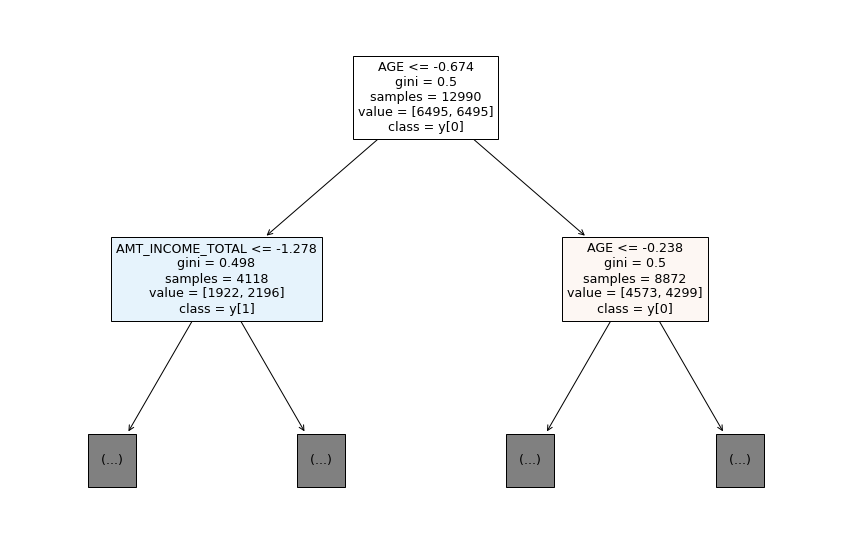

In [115]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dm,max_depth = 1,
               feature_names=x_train_oversam.columns,  
                   class_names=True,
                   filled=True)
plt.show()

## [26] XGBoost Classifier

In [116]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train_oversam, y_train_oversam)

[23:08:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=40,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
print('Accuracy : ', xgb.score(x_test_oversam, y_test_oversam)*100, '%')
y_pred = xgb.predict(x_test_oversam)
print(confusion_matrix(y_test_oversam, y_pred))
print(classification_report(y_test_oversam, y_pred))

Accuracy :  42.73148148148148 %
[[1381  779]
 [1695  465]]
              precision    recall  f1-score   support

           0       0.45      0.64      0.53      2160
           1       0.37      0.22      0.27      2160

    accuracy                           0.43      4320
   macro avg       0.41      0.43      0.40      4320
weighted avg       0.41      0.43      0.40      4320



## [27] SMOTE OVERSAMPLING

In [118]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

## [28] Logistic Regression

In [119]:
log = LogisticRegression()
log.fit(x_train_oversam, y_train_oversam)

LogisticRegression()

In [120]:
print("Accuracy:",log.score(x_test_oversam, y_test_oversam)*100)
y_pred = log.predict(x_test_oversam)
print(confusion_matrix(y_test_oversam, y_pred))
print(classification_report(y_test_oversam, y_pred))

Accuracy: 52.5
[[1162  998]
 [1054 1106]]
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      2160
           1       0.53      0.51      0.52      2160

    accuracy                           0.53      4320
   macro avg       0.53      0.53      0.52      4320
weighted avg       0.53      0.53      0.52      4320



## [29] Decision Tree

In [121]:
dm = DecisionTreeClassifier(max_depth = 16,min_samples_split=8)

dm.fit(x_train_oversam, y_train_oversam)

DecisionTreeClassifier(max_depth=16, min_samples_split=8)

In [122]:
print("Accuracy:",dm.score(x_test_oversam, y_test_oversam)*100)
y_pred = dm.predict(x_test_oversam)
print(confusion_matrix(y_test_oversam, y_pred))
print(classification_report(y_test_oversam, y_pred))

Accuracy: 69.83796296296296
[[1730  430]
 [ 873 1287]]
              precision    recall  f1-score   support

           0       0.66      0.80      0.73      2160
           1       0.75      0.60      0.66      2160

    accuracy                           0.70      4320
   macro avg       0.71      0.70      0.70      4320
weighted avg       0.71      0.70      0.70      4320



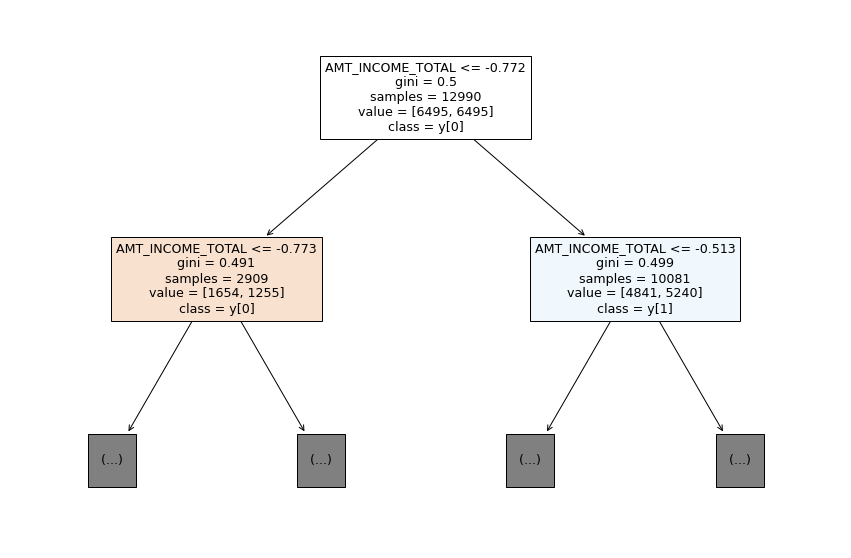

In [123]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dm,max_depth = 1,
               feature_names=x_train_oversam.columns,  
                   class_names=True,
                   filled=True)
plt.show()

## [30] XGBoost

In [124]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train_oversam, y_train_oversam)

[23:08:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=40,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
print('Accuracy : ', xgb.score(x_test_oversam, y_test_oversam)*100, '%')
y_pred = xgb.predict(x_test_oversam)
print(confusion_matrix(y_test_oversam, y_pred))
print(classification_report(y_test_oversam, y_pred))

Accuracy :  83.07870370370371 %
[[2032  128]
 [ 603 1557]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      2160
           1       0.92      0.72      0.81      2160

    accuracy                           0.83      4320
   macro avg       0.85      0.83      0.83      4320
weighted avg       0.85      0.83      0.83      4320



## [31] ADASYN for oversampling

In [126]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

## [32] Logistic Regression

In [127]:
log = LogisticRegression()
log.fit(x_train_oversam, y_train_oversam)

LogisticRegression()

In [128]:
print("Accuracy:",log.score(x_test_oversam, y_test_oversam)*100)
y_pred = log.predict(x_test_oversam)
print(confusion_matrix(y_test_oversam, y_pred))
print(classification_report(y_test_oversam, y_pred))

Accuracy: 52.89044289044289
[[ 753 1407]
 [ 614 1516]]
              precision    recall  f1-score   support

           0       0.55      0.35      0.43      2160
           1       0.52      0.71      0.60      2130

    accuracy                           0.53      4290
   macro avg       0.53      0.53      0.51      4290
weighted avg       0.53      0.53      0.51      4290



## [33] Decision Tree

In [129]:
dm = DecisionTreeClassifier(max_depth = 16,min_samples_split=8)

dm.fit(x_train_oversam, y_train_oversam)

DecisionTreeClassifier(max_depth=16, min_samples_split=8)

In [130]:
print("Accuracy:",dm.score(x_test_oversam, y_test_oversam)*100)
y_pred = dm.predict(x_test_oversam)
print(confusion_matrix(y_test_oversam, y_pred))
print(classification_report(y_test_oversam, y_pred))

Accuracy: 69.74358974358974
[[1580  580]
 [ 718 1412]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      2160
           1       0.71      0.66      0.69      2130

    accuracy                           0.70      4290
   macro avg       0.70      0.70      0.70      4290
weighted avg       0.70      0.70      0.70      4290



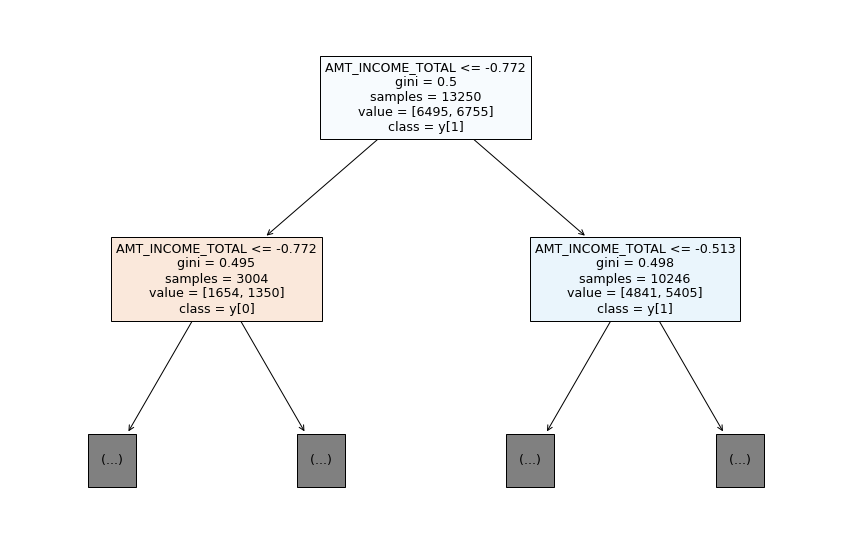

In [131]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dm,max_depth = 1,
               feature_names=x_train_oversam.columns,  
                   class_names=True,
                   filled=True)
plt.show()

## [34] XGBoost

In [132]:
xgb = XGBClassifier()
xgb.fit(x_train_oversam, y_train_oversam)

[23:09:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=40,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
print('Accuracy : ', xgb.score(x_test_oversam, y_test_oversam)*100, '%')
y_pred = xgb.predict(x_test_oversam)
print(confusion_matrix(y_test_oversam, y_pred))
print(classification_report(y_test_oversam, y_pred))

Accuracy :  82.82051282051283 %
[[2030  130]
 [ 607 1523]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      2160
           1       0.92      0.72      0.81      2130

    accuracy                           0.83      4290
   macro avg       0.85      0.83      0.83      4290
weighted avg       0.85      0.83      0.83      4290

